In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import copy
import pickle

%matplotlib inline

In [2]:
fp = open("./lightCurveSums/lightcurves/tesslc_364539361.pkl","rb")
data = pickle.load(fp)
fp.close()

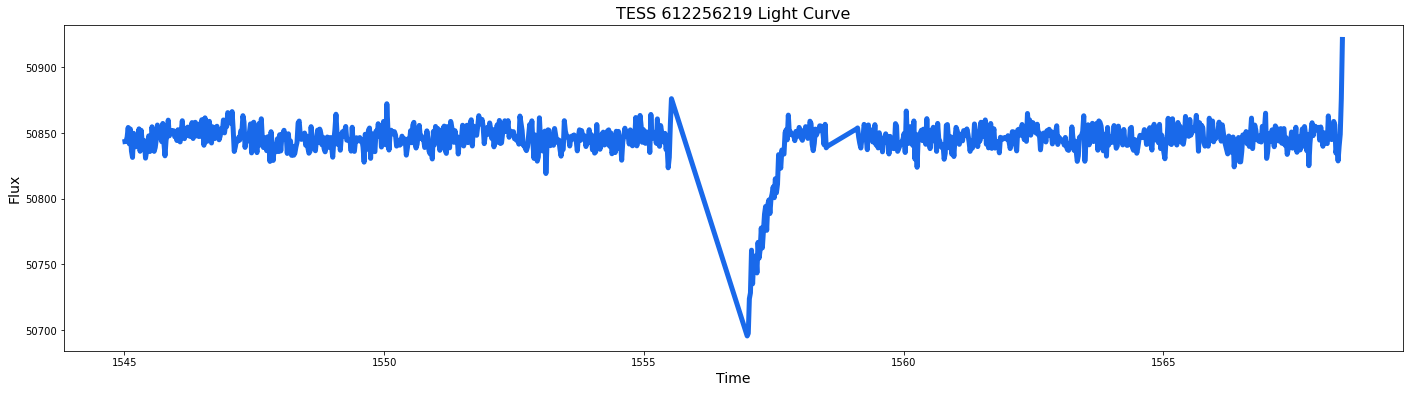

In [6]:
q = data[11] == 0
times = data[6][q]
lc = data[8][q]

cutTimes, cutLc = cutLightCurve(times, lc, 1545, 1600)
##cutLc = removeNoise(cutLc)

fig, ax = plt.subplots(1,1,figsize=(24,6))
ax.plot(cutTimes,cutLc,color="#1969ea",ls="-",lw=5)
plt.xlabel("Time",fontsize=14)
plt.ylabel("Flux",fontsize=14)
plt.title(r"TESS 612256219 Light Curve",fontsize=16)
plt.show()

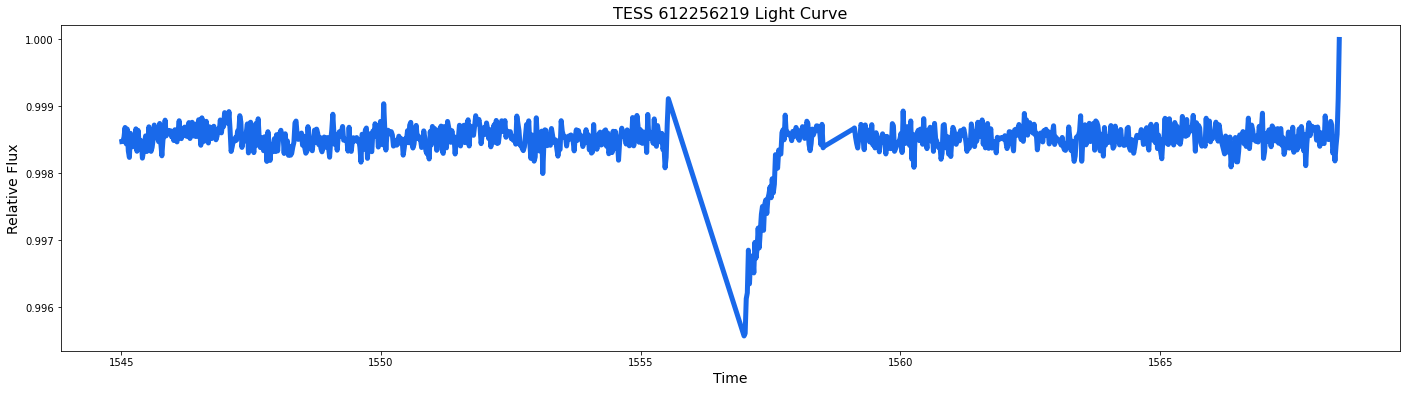

In [7]:
maxlc = max(cutLc)
normLc = cutLc/maxlc

fig, ax = plt.subplots(1,1,figsize=(24,6))
ax.plot(cutTimes,normLc,color="#1969ea",ls="-",lw=5)
plt.xlabel("Time",fontsize=14)
plt.ylabel("Relative Flux",fontsize=14)
plt.title(r"TESS 612256219 Light Curve",fontsize=16)
plt.show()

In [4]:
def cutLightCurve(times, lc, t0, t1):
    newTimes = []
    newLc = []
    for i in range(len(times)):
        if times[i] > t0 and times[i] < t1:
            newTimes.append(times[i])
            newLc.append(lc[i])
            
    return newTimes,newLc

In [5]:
def removeNoise(lc):
    med = np.median(lc)
    q1 = np.percentile(lc, 25)
    q3 = np.percentile(lc, 75)
    iqr = q3-q1
    print (med, iqr)
    for i in range(len(lc)):
        if lc[i] > 1.5*iqr + q3 or lc[i] < q1 - 1.5*iqr:
            lc[i] = med
    return lc